# LOS (Encounter)

# Data Science and Machine Learning

# Project 2020

In [1]:
import pandas as pd
import numpy as np
import math

#to plot within notebook
import matplotlib as plt
%matplotlib inline

import datetime as dt
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import numpy as np
import pickle
from sklearn.externals import joblib
from sklearn import datasets

In [2]:
#Reading the dataset in a dataframe using Pandas
df = pd.read_csv("../Datasets/Encounter/encounter.csv")

In [3]:
#number of rows and column in the dataset
df.shape

(5447, 28)

In [4]:
df.head(5)

,Provider_Org,Encounter_ID,Member_ID,Provider_ID,Provider_NPI,Clinic_ID,Encounter_DateTime,Encounter_Description,CC,Episode_ID,...,medication_orders_count,medication_fulfillment_count,vital_sign_count,therapy_orders_count,therapy_actions_count,immunization_count,Has_Appt,SOAP_Note,consult_ordered,Disposition
0,ExactData Medical Health System,L8694502508698944760,568001602-01,663746638,2531462832,Sidney Hillman Health Center,2005-06-30T19:15:00Z,Lacy visited primary care physician on 6/30/20...,mild occasional lightheadedness,L8694502508698944760,...,1,0,7,0,1,0,True,s:a 33 year old female crystallographer presen...,NaN,ReleasedWithoutLimitations
1,ExactData Medical Health System,V3046573432409333612,568001602-01,523808810,1380097962,Corner Drug Store,2005-07-01T23:44:00Z,Lacy visited pharmacy on 7/1/2005 6:44:00 PM f...,NaN,L8694502508698944760,...,0,1,0,0,0,0,False,NaN,NaN,ReleasedWithoutLimitations
2,ExactData Medical Health System,X3228783097331248888,568001602-01,695700114,1261075194,Wood Diagnostic Labs,2005-07-05T14:54:00Z,Lacy visited medical lab on 7/5/2005 9:54:00 A...,NaN,L8694502508698944760,...,0,0,0,0,0,0,False,NaN,NaN,ReleasedWithoutLimitations
3,ExactData Medical Health System,M3204724885018391695,568001602-01,663746638,2531462832,Sidney Hillman Health Center,2005-10-07T15:45:00Z,Lacy visited primary care physician on 10/7/20...,NaN,M3204724885018391695,...,0,0,7,0,1,1,True,s:33 yr old female crystallographer presents t...,NaN,ReleasedWithoutLimitations
4,ExactData Medical Health System,G7012345417035113309,568001602-01,695700114,1261075194,Wood Diagnostic Labs,2005-10-12T20:33:00Z,Lacy visited medical lab on 10/12/2005 3:33:00...,NaN,M3204724885018391695,...,0,0,0,0,0,0,False,NaN,NaN,ReleasedWithoutLimitations


In [5]:
#Get summary of numerical variables
df.describe()

,Provider_ID,Provider_NPI,Facility_Name,lab_orders_count,lab_results_count,medication_orders_count,medication_fulfillment_count,vital_sign_count,therapy_orders_count,therapy_actions_count,immunization_count
count,5.447000e+03,5.447000e+03,0.0,5447.000000,5447.000000,5447.000000,5447.000000,5447.000000,5447.000000,5447.000000,5447.000000
mean,5.407194e+08,2.059532e+09,NaN,0.676336,1.066459,0.140261,0.215899,3.348999,0.040573,0.502478,0.069396
std,2.544013e+08,5.876596e+08,NaN,1.738737,1.315180,0.347818,0.414151,3.497062,0.208184,0.508777,0.292446
min,1.085816e+08,1.032123e+09,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.610516e+08,1.684152e+09,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.196257e+08,2.056627e+09,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.340647e+08,2.531463e+09,NaN,0.000000,2.000000,0.000000,0.000000,7.000000,0.000000,1.000000,0.000000
max,9.934232e+08,2.982693e+09,NaN,15.000000,7.000000,2.000000,2.000000,7.000000,2.000000,2.000000,4.000000


In [6]:
#Get summary of non numerical variables
#df['Member_ID'].value_counts()

In [7]:
#the number of missing values in each column
# df.apply(lambda x: sum(x.isnull()),axis=0) 
# df.dtypes

In [8]:
#Converting date to format day-month-year
# .apply(lambda x: dt.datetime.strftime(x, '%d-%m-%Y'))
df['Encounter_DateTime'] = pd.to_datetime(df['Encounter_DateTime']).dt.date
# df['Encounter_DateTime'].dt.date.head(50)
df.head(5)

,Provider_Org,Encounter_ID,Member_ID,Provider_ID,Provider_NPI,Clinic_ID,Encounter_DateTime,Encounter_Description,CC,Episode_ID,...,medication_orders_count,medication_fulfillment_count,vital_sign_count,therapy_orders_count,therapy_actions_count,immunization_count,Has_Appt,SOAP_Note,consult_ordered,Disposition
0,ExactData Medical Health System,L8694502508698944760,568001602-01,663746638,2531462832,Sidney Hillman Health Center,2005-06-30,Lacy visited primary care physician on 6/30/20...,mild occasional lightheadedness,L8694502508698944760,...,1,0,7,0,1,0,True,s:a 33 year old female crystallographer presen...,NaN,ReleasedWithoutLimitations
1,ExactData Medical Health System,V3046573432409333612,568001602-01,523808810,1380097962,Corner Drug Store,2005-07-01,Lacy visited pharmacy on 7/1/2005 6:44:00 PM f...,NaN,L8694502508698944760,...,0,1,0,0,0,0,False,NaN,NaN,ReleasedWithoutLimitations
2,ExactData Medical Health System,X3228783097331248888,568001602-01,695700114,1261075194,Wood Diagnostic Labs,2005-07-05,Lacy visited medical lab on 7/5/2005 9:54:00 A...,NaN,L8694502508698944760,...,0,0,0,0,0,0,False,NaN,NaN,ReleasedWithoutLimitations
3,ExactData Medical Health System,M3204724885018391695,568001602-01,663746638,2531462832,Sidney Hillman Health Center,2005-10-07,Lacy visited primary care physician on 10/7/20...,NaN,M3204724885018391695,...,0,0,7,0,1,1,True,s:33 yr old female crystallographer presents t...,NaN,ReleasedWithoutLimitations
4,ExactData Medical Health System,G7012345417035113309,568001602-01,695700114,1261075194,Wood Diagnostic Labs,2005-10-12,Lacy visited medical lab on 10/12/2005 3:33:00...,NaN,M3204724885018391695,...,0,0,0,0,0,0,False,NaN,NaN,ReleasedWithoutLimitations


In [9]:
series = df['Encounter_DateTime'].value_counts()
series = pd.DataFrame(series)
# Reset the index of dataframe
series = series.reset_index()
series.columns = ['Date', 'Patient']
# **********
# series['Patient'] = np.random.randint(10,1000, size=len(series))
# **********
# sorting usind the date
series_summary = series.sort_values(by=['Date'], ascending=True)
series_summary.tail(10)
series_summary.shape

(2376, 2)

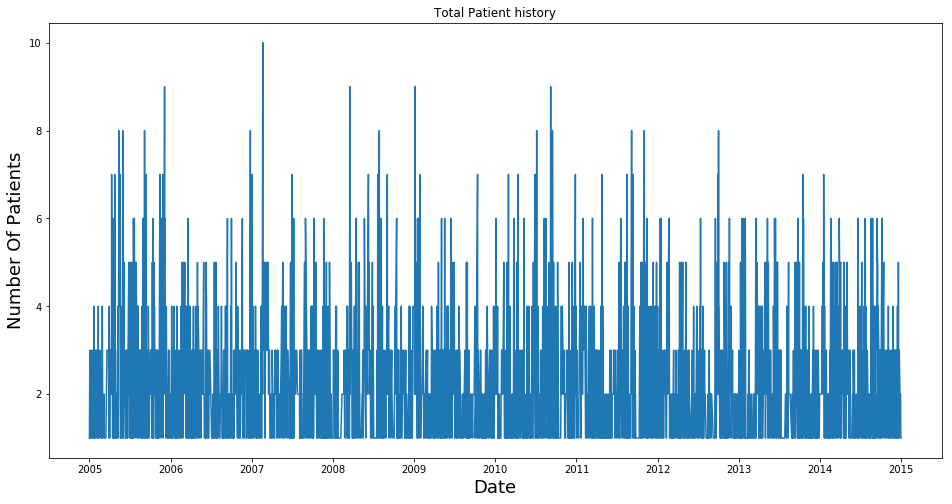

In [10]:
#setting index as date
#df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
series_summary.index = series_summary['Date']
# series_summary.drop('Date', axis=1, inplace=True)

#plot
pyplot.figure(figsize=(16,8))
pyplot.title('Total Patient history')
pyplot.plot(series_summary['Patient'])
pyplot.xlabel('Date',fontsize=18)
pyplot.ylabel('Number Of Patients',fontsize=18)
pyplot.show()
# pyplot.plot(series_summary['Patient'], label='Total Patient history')
# series_summary

# Model Long Short Term Memory (LSTM)

In [487]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [488]:
#creating dataframe
data = series_summary.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(series_summary)),columns=['Date', 'Patient'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Patient'][i] = data['Patient'][i]
# new_data

In [489]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)
# new_data
new_data.to_csv(r'..\Datasets\Encounter\Cleaned\dailyEncounter.csv')

In [490]:
#Converting the dataframe to a numpy array
dataset = new_data.values
# #Get /Compute the number of rows to train the model on
# training_data_len = math.ceil( len(dataset) *.8)
# training the whole dataset
training_data_len = len(dataset)
#Scale the all of the data to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
#Create the scaled training data set 
train = scaled_data[0:training_data_len  , : ]
#OR
#creating train and test sets
# train = dataset[0:training_data_len,:]
# valid = dataset[training_data_len:,:]
# new_data
# train
# training_data_len

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [491]:
#converting dataset into x_train and y_train
# x_train, y_train = train[:, :-1], train[:,-1]
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(train[i-60:i,0])
    y_train.append(train[i,0])
#OR
# for i in range(60,len(train)):
#     x_train.append(scaled_data[i-60:i,0])
#     y_train.append(scaled_data[i,0])

#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [492]:
# create and fit the LSTM network
model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.1))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.1))

# Adding the output layer
# model.add(Dense(units=25))
model.add(Dense(units=1))
# model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
#Train the model
# model.fit(x_train, y_train, epochs=100, batch_size=100, verbose=2)
model.fit(x_train, y_train, epochs=20, batch_size=100, verbose=2)

Train on 2316 samples
Epoch 1/20
2316/2316 - 112s - loss: 0.0290
Epoch 2/20
2316/2316 - 4s - loss: 0.0269
Epoch 3/20
2316/2316 - 4s - loss: 0.0269
Epoch 4/20
2316/2316 - 4s - loss: 0.0269
Epoch 5/20
2316/2316 - 4s - loss: 0.0268
Epoch 6/20
2316/2316 - 4s - loss: 0.0269
Epoch 7/20
2316/2316 - 4s - loss: 0.0271
Epoch 8/20
2316/2316 - 4s - loss: 0.0269
Epoch 9/20
2316/2316 - 4s - loss: 0.0269
Epoch 10/20
2316/2316 - 4s - loss: 0.0268
Epoch 11/20
2316/2316 - 4s - loss: 0.0267
Epoch 12/20
2316/2316 - 4s - loss: 0.0268
Epoch 13/20
2316/2316 - 4s - loss: 0.0268
Epoch 14/20
2316/2316 - 4s - loss: 0.0267
Epoch 15/20
2316/2316 - 4s - loss: 0.0268
Epoch 16/20
2316/2316 - 4s - loss: 0.0269
Epoch 17/20
2316/2316 - 4s - loss: 0.0269
Epoch 18/20
2316/2316 - 4s - loss: 0.0267
Epoch 19/20
2316/2316 - 4s - loss: 0.0266
Epoch 20/20
2316/2316 - 4s - loss: 0.0268


In [493]:
# Create the distribution strategy
# mirrored_strategy = tf.distribute.MirroredStrategy()
# with mirrored_strategy.scope():
#     model = model

In [523]:
# #Test data set
# test_data = scaled_data[training_data_len - 60: , : ]
#Test data set on tomorrow 
test_data = scaled_data[training_data_len-4 - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
# y_test =  dataset[training_data_len : , : ]
#Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
#Convert x_test to a numpy array 
x_test = np.array(x_test)
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling
#OR
#predicting 246 values, using past 60 from the train data
# inputs = new_data[len(new_data) - len(valid) - 60:].values
# inputs = inputs.reshape(-1,1)
# inputs  = scaler.transform(inputs)

# X_test = []
# for i in range(60,inputs.shape[0]):
#     X_test.append(inputs[i-60:i,0])
# X_test = np.array(X_test)

# X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
# patients_no = model.predict(X_test)
# patients_no = scaler.inverse_transform(patients_no)

IndexError: tuple index out of range

In [ ]:
test_data.shape

In [ ]:
predictions

In [497]:
x_test.shape

(40, 60, 1)

# Results

In [498]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse
#OR
# rms=np.sqrt(np.mean(np.power((valid-patients_no),2)))
# rms

ValueError: operands could not be broadcast together with shapes (40,1) (475,1) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


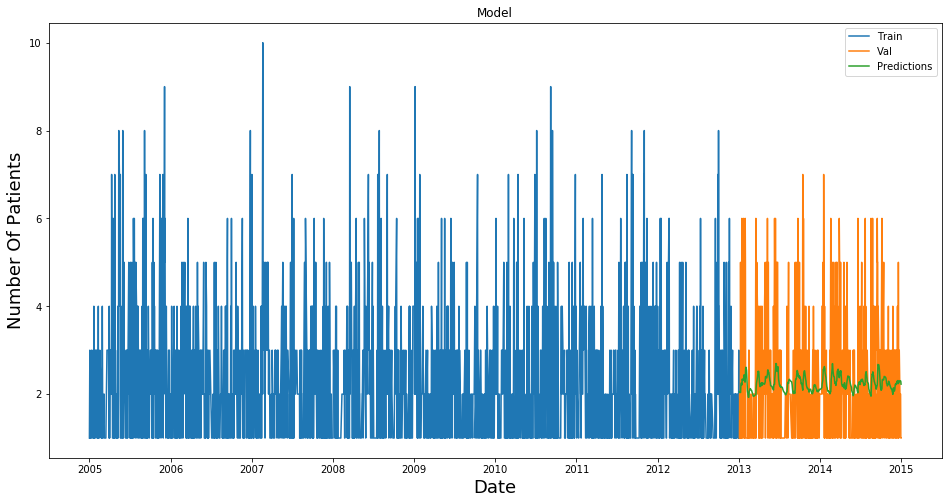

In [345]:
#Plot/Create the data for the graph
train = new_data[:training_data_len]
valid = new_data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
pyplot.figure(figsize=(16,8))
pyplot.title('Model')
pyplot.xlabel('Date', fontsize=18)
pyplot.ylabel('Number Of Patients', fontsize=18)
pyplot.plot(train['Patient'])
pyplot.plot(valid[['Patient', 'Predictions']])
pyplot.legend(['Train', 'Val', 'Predictions'], loc='upper right')
pyplot.show()
#OR
#for plotting
# train = new_data[:1900]
# valid = new_data[1900:]
# valid['Predictions'] = patients_no
# pyplot.figure(figsize=(20,10))
# pyplot.plot(train['Patient'])
# pyplot.plot(valid[['Patient','Predictions']])
#plot
# pyplot.figure(figsize=(16,8))
# pyplot.plot(series_summary['Quantity'], label='Total Quantity history')

In [347]:
#Show the valid and predicted prices
valid.head(5)
# valid.shape
#OR
# actual = pd.DataFrame(new_data['Patient'].tail(9))
# predicted = pd.DataFrame(valid['Predictions'])
# compare = actual.join(predicted)
# compare

,Patient,Predictions
Date,,
2013-01-03,1,2.055455
2013-01-04,2,2.041218
2013-01-07,1,2.047374
2013-01-08,5,2.035538
2013-01-09,3,2.136484


In [524]:
# pickle.dump(model, 'model.pkl', 'wb')
# pickle.dump(model, open('encounter_model_LSTM.pkl', 'wb'))
# joblib.dump(model, 'model.pkl')
# model.save('daily_encounter_model_LSTM.h5')
model.save('encounter_model_LSTM.h5')

In [525]:
# loaded_model = joblib.load('encounter_model_LSTM.pkl')
# loaded_model = pickle.load(open("encounter_model_LSTM.pkl", "rb"))
loaded_model = tf.keras.models.load_model('daily_encounter_model_LSTM.h5')
loaded_model = tf.keras.models.load_model('daily_encounter_model_LSTM.h5')

In [526]:
loaded_model

In [527]:
# Export Pandas DataFrame to a CSV File
dailyEncounter = pd.read_csv("../Datasets/Encounter/Cleaned/dailyEncounter.csv")
#setting index as date
dailyEncounter['Date'] = pd.to_datetime(dailyEncounter.Date,format='%Y-%m-%d')
dailyEncounter.index = dailyEncounter['Date']
dailyEncounter.drop('Date', axis=1, inplace=True)
#Converting the dataframe to a numpy array
daily_dataset = dailyEncounter.values
#Get teh last 60 day closing price 
last_60_days = dailyEncounter[-60:].values
#Scale the all of the data to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1)) 
daily_scaled_data = scaler.fit_transform(daily_dataset)
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


# Predict Only One Day

In [528]:
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = loaded_model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)

In [529]:
pred_price

array([[2.0480282]], dtype=float32)

# Predict Multiple Days

In [530]:
data_len = len(dataset)
#Test data set
loaded_test_data = daily_scaled_data[data_len-4 - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
# y_test =  dataset[training_data_len : , : ]
#Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(loaded_test_data)):
    x_test.append(loaded_test_data[i-60:i,0])
#Convert x_test to a numpy array 
x_test = np.array(x_test)
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
#Getting the models predicted price values
pred_price = model.predict(x_test) 
pred_price = scaler.inverse_transform(pred_price)#Undo scaling

In [531]:
pred_price

array([[2.2059996],
       [2.2023904],
       [2.181668 ],
       [2.1224594]], dtype=float32)

In [519]:
loaded_test_data.shape

(64, 1)

In [521]:
# convert numpy array to json
import json
lists = pred_price. tolist()
json_str = json.dumps(lists)
json_str
lists

[[2.2059996128082275],
 [2.202390432357788],
 [2.1816680431365967],
 [2.1224594116210938]]

In [30]:
for i in range(5, 10):
    print(i)

5
6
7
8
9


# Linear Regression

In [97]:
#creating dataframe
data = series_summary.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(series_summary)),columns=['Date', 'Patient'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Patient'][i] = data['Patient'][i]
# new_data

In [98]:
#setting index
# new_data.index = new_data.Date
# new_data.drop('Date', axis=1, inplace=True)
# new_data

In [99]:
# #create features
# from fastai.structured import  add_datepart
# add_datepart(new_data, 'Date')
# new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp
# new_data['mon_fri'] = 0
# new_data['Dayofweek'] = 0
# for i in range(0,len(new_data)):
#     if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
#         new_data['mon_fri'][i] = 1
#     else:
#         new_data['mon_fri'][i] = 0

In [100]:
# new_data

In [101]:

#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(new_data) *.8)
# convert the date into numerical value
new_data['Date']=new_data['Date'].map(dt.datetime.toordinal)
#split into train and validation
train = new_data[:training_data_len]
valid = new_data[training_data_len:]

x_train = train.drop('Patient', axis=1)
y_train = train['Patient']
x_valid = valid.drop('Patient', axis=1)
y_valid = valid['Patient']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [102]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

1.4610899594218263

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


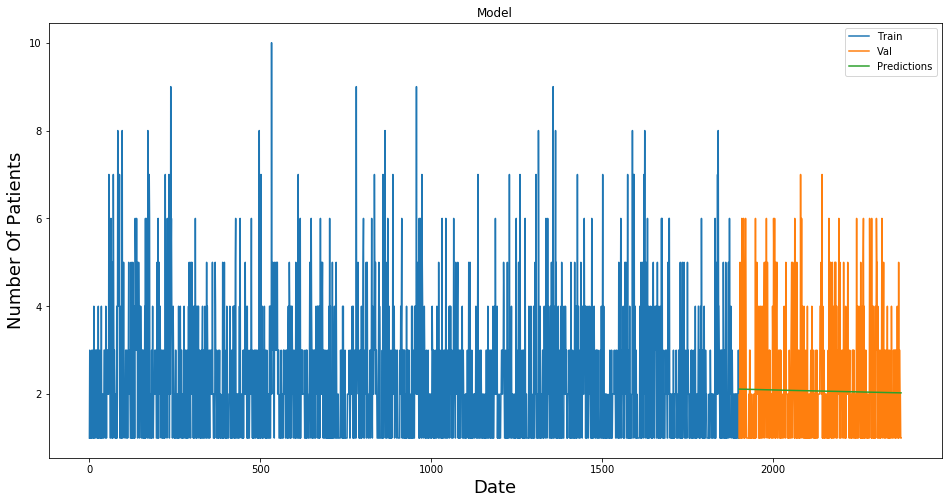

In [103]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[training_data_len:].index
train.index = new_data[:training_data_len].index

# pyplot.plot(train['Patient'])
# pyplot.plot(valid[['Patient', 'Predictions']])

#Visualize the data
pyplot.figure(figsize=(16,8))
pyplot.title('Model')
pyplot.xlabel('Date', fontsize=18)
pyplot.ylabel('Number Of Patients', fontsize=18)
pyplot.plot(train['Patient'])
pyplot.plot(valid[['Patient', 'Predictions']])
pyplot.legend(['Train', 'Val', 'Predictions'], loc='upper right')
pyplot.show()

In [37]:
valid

,Patient,mon_fri,Dayofweek,Predictions
Date,,,,
2013-01-03,1,1,0,2.286165
2013-01-04,2,1,0,2.286165
2013-01-07,1,1,0,2.286165
2013-01-08,5,1,0,2.286165
2013-01-09,3,1,0,2.286165
2013-01-10,1,1,0,2.286165
2013-01-11,2,1,0,2.286165
2013-01-13,1,1,0,2.286165
2013-01-14,6,1,0,2.286165
